In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 24})

In [2]:
movingaverage = lambda x, N: np.convolve(x, np.ones(N)/N, mode='valid')

graphene = np.load('graphene-nosoc.npz', allow_pickle=True)
MoS2 = np.load('MoS2.npz', allow_pickle=True)
GaN = np.load('GaN.npz', allow_pickle=True)
GaP = np.load('GaP.npz', allow_pickle=True)

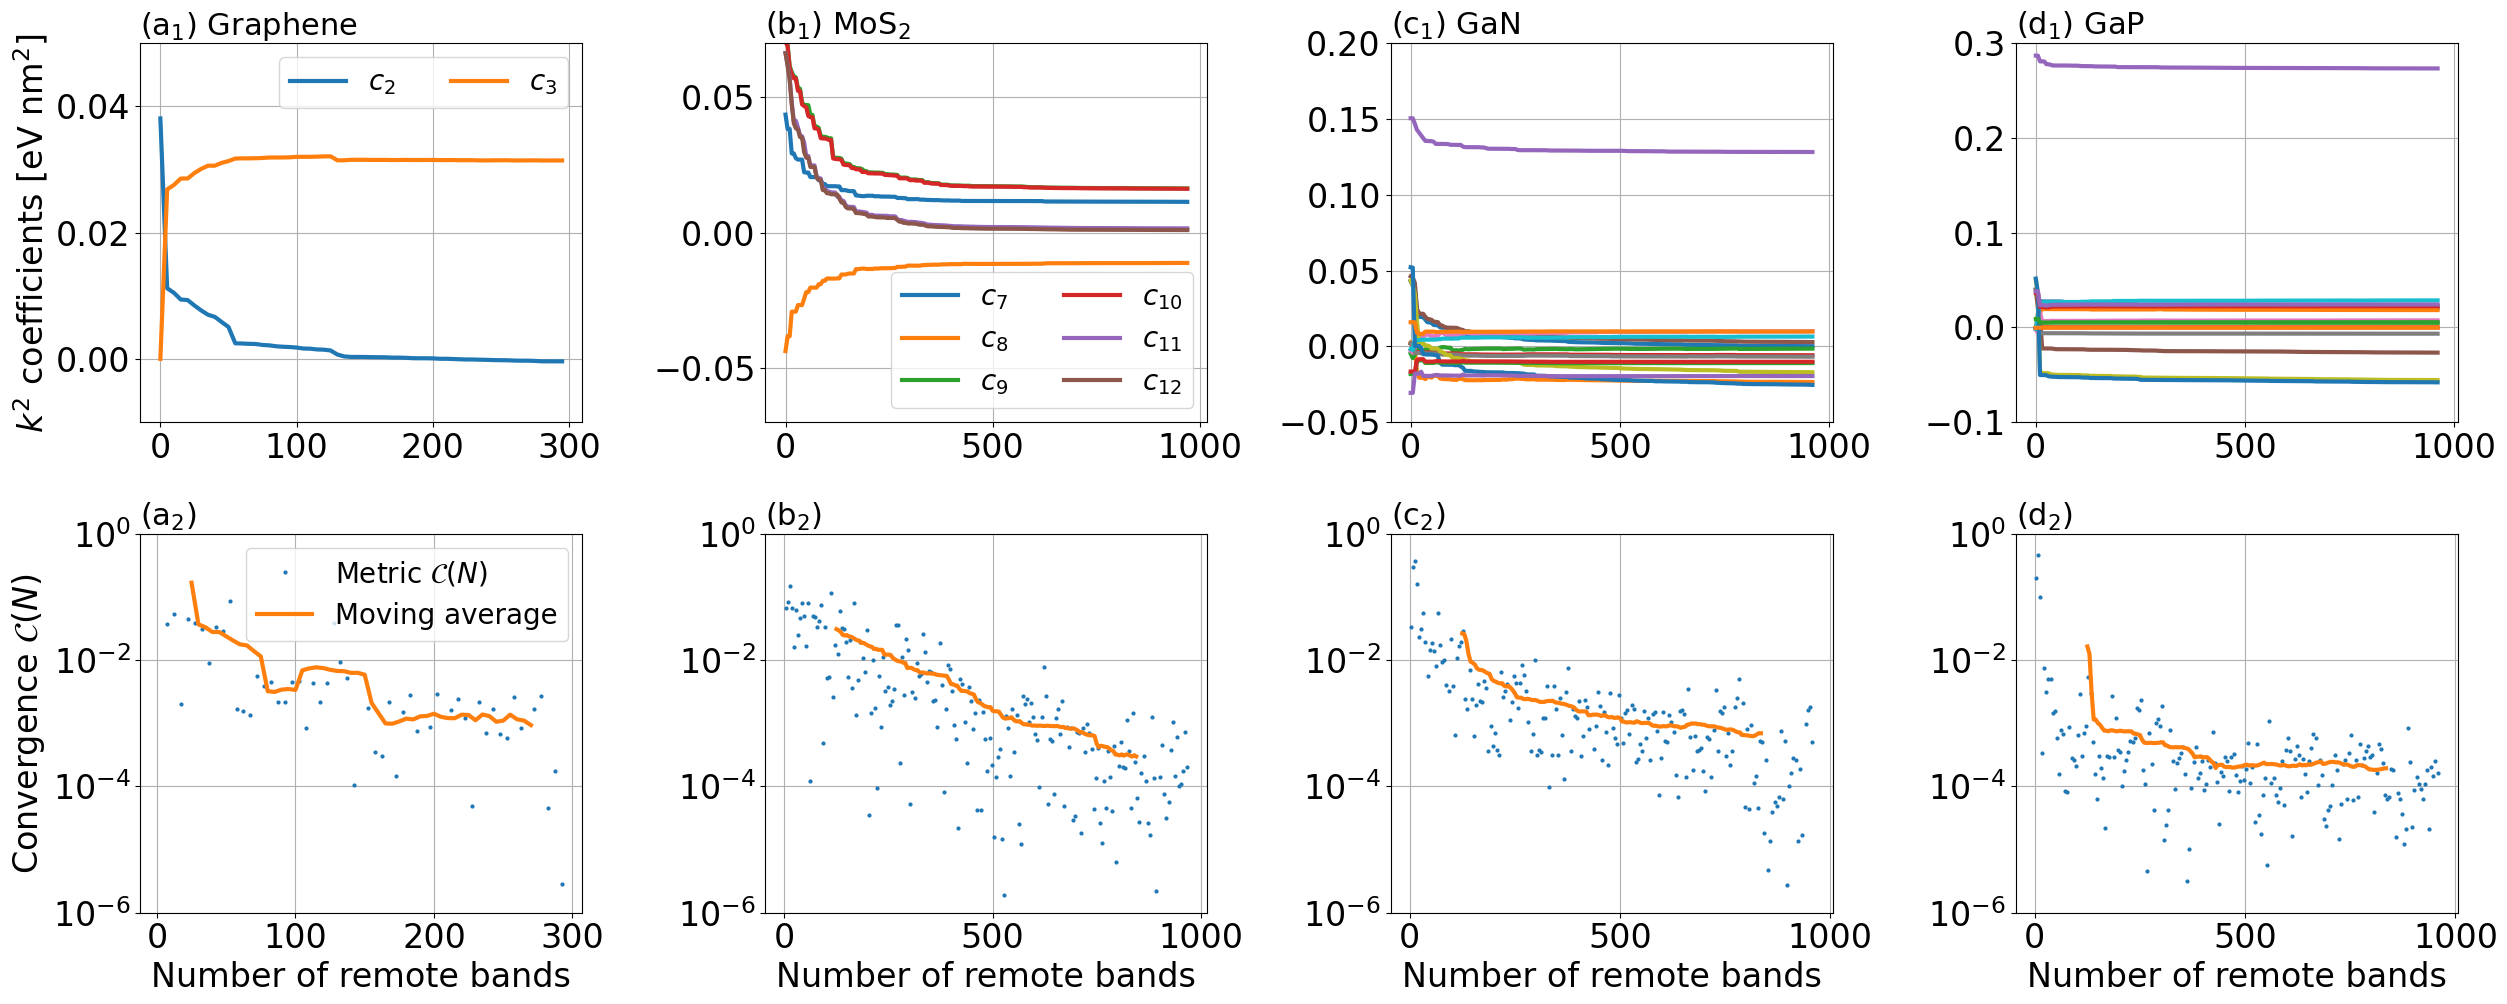

In [4]:
plt.figure(figsize=(4*6.4, 2.2*4.8))

steps = [5, 5, 5, 5]
top = [r'(a$_1$) Graphene', r'(b$_1$) MoS$_2$', r'(c$_1$) GaN', r'(d$_1$) GaP']
bot = [r'(a$_2$)', r'(b$_2$)', r'(c$_2$)', r'(d$_2$)']
window = [10, 50, 50, 50]
ylim1 = [-0.01, -0.07, -0.05, -0.10]
ylim2 = [+0.05, +0.07, +0.20, +0.30]

for i, material in zip(range(4), [graphene, MoS2, GaN, GaP]):
    NBs = material['NBs'][::steps[i]]
    cns = material['cns'][::steps[i]]
    keys = material['keys'][()]

    plt.subplot(2,4,1+i)
    plt.title(top[i], fontsize=22, loc='left')
    diff = 0
    total = 0
    for n in range(cns.shape[1]):
        # only k² or larger powers depend on number of remote bands
        if set(keys[n]) & set([0, 'x','y','z','xz','yz','zz']):
            continue
        # else
        diff += np.abs(np.diff(cns[:,n]))
        total += np.abs(cns[1:,n])
        plt.plot(NBs, cns[:,n], label=r'$c_{'+str(n)+'}$', lw=3)
    if i < 2: plt.legend(fontsize=20, ncols=2)
    # plt.xlabel('Number of remote bands')
    if i == 0: plt.ylabel(r'$k^2$ coefficients [eV nm$^2$]')
    plt.grid()
    plt.ylim(ylim1[i], ylim2[i])
    
    ###################################################
    plt.subplot(2,4,5+i)
    plt.title(bot[i], fontsize=22, loc='left')
    convergence = diff / total

    dNBs = (NBs[1:] + NBs[:-1])/2
    plt.semilogy(dNBs, convergence, 'o', ms=2, label='Metric $\mathcal{C}(N)$')
    plt.plot(movingaverage(dNBs, window[i]), movingaverage(convergence, window[i]), lw=3, label='Moving average')
    if i == 0: plt.legend(fontsize=20)
    plt.xlabel('Number of remote bands')
    if i == 0: plt.ylabel(r'Convergence $\mathcal{C}(N)$')
    plt.ylim(1e-6, 1)
    plt.grid()
    
plt.tight_layout()
plt.savefig('convergence.png')
plt.savefig('convergence.svg')
plt.show()